In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score ,precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [70]:
dataset=pd.read_csv("/modified_diabetes_prediction_dataset.csv")
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
1,Female,NaN,0,0,No Info,28.034572,6.6,80,0
2,Male,28.0,0,0,NaN,25.369152,5.7,9999,0
3,Female,37.0,0,0,yes,25.262602,NaN,155,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0


In [71]:
dataset.shape

(100001, 9)

In [72]:
columns=dataset.columns
print(columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [73]:
dataset = dataset.dropna(subset=['diabetes'])

In [74]:
# حذف داده‌های تکراری
dataset = dataset.drop_duplicates()

In [75]:
dataset.shape

(100001, 9)

In [76]:
dataset['smoking_history'].unique()

array(['never', 'No Info', nan, 'yes', 'current', 'former', 'ever',
       'not current'], dtype=object)

In [77]:
dataset['gender'].unique()

array(['unknown', 'Female', 'Male', 'Other'], dtype=object)

In [78]:
dataset['gender'].mode()

,gender
0,Female


In [79]:
dataset['smoking_history'].mode()

,smoking_history
0,No Info


In [80]:
dataset['gender'] = dataset['gender'].map({'Male':0 ,'Female': 1,'Other':1,'unknown':1})
dataset['smoking_history'] = dataset['smoking_history'].map({'never':0,'former':1,'not current':2,'No Info':3, 'current':4 ,'yes':4, 'ever':5})


In [81]:
dataset['smoking_history'].median()

2.0

In [82]:
dataset['smoking_history'].mode()

,smoking_history
0,3.0


In [83]:
dataset= dataset.fillna(value={	'gender': dataset['gender'].mode(),'smoking_history': dataset['smoking_history'].mode(),'hypertension': dataset['hypertension'].mode(), 'age': dataset['age'].mean(),'bmi': dataset['bmi'].mean(),'blood_glucose_level': dataset['blood_glucose_level'].mean(),'HbA1c_level': dataset['HbA1c_level'].mean() , 'heart_disease': dataset['heart_disease'].mode()})

In [84]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,78.00000,0,1,0.0,101.665015,6.600000,140,0
1,1,41.39193,0,0,3.0,28.034572,6.600000,80,0
2,0,28.00000,0,0,NaN,25.369152,5.700000,9999,0
3,1,37.00000,0,0,4.0,25.262602,5.527523,155,0
4,0,75.00000,1,1,4.0,23.212811,4.800000,155,0


In [85]:
dataset['smoking_history'].unique()

array([ 0.,  3., nan,  4.,  1.,  5.,  2.])

In [86]:
dataset['gender'].unique()

array([1, 0])

In [87]:
# change values that are less than 0
col_num = ['age', 'bmi','blood_glucose_level','HbA1c_level']
for col in col_num:
    mean_value = dataset[dataset[col] > 0][col].mean()
    dataset[col] = dataset[col].apply(lambda x: mean_value if x <= 0 else x)
col_binarry = ['hypertension', 'heart_disease']
for col in col_binarry:
    mode_value = dataset[dataset[col] >= 0][col].mode()
    dataset[col] = dataset[col].apply(lambda x: mode_value if x < 0 else x)

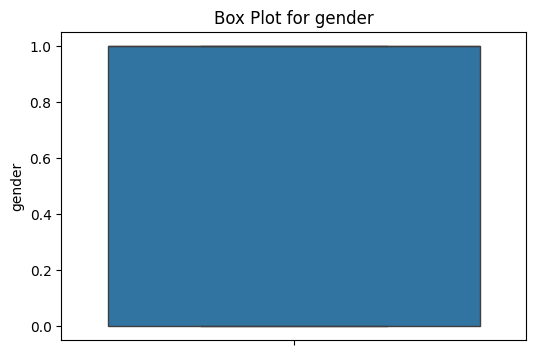

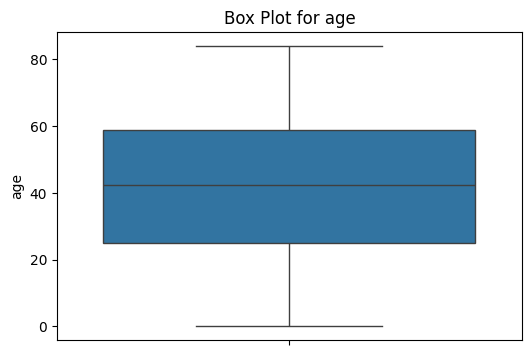

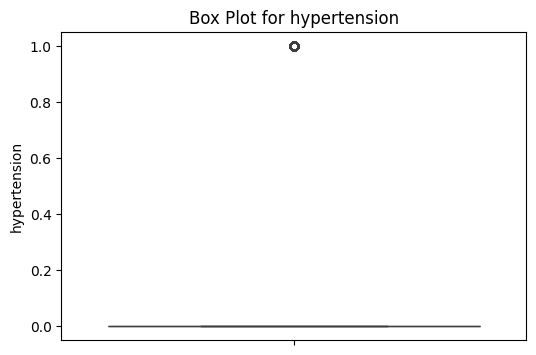

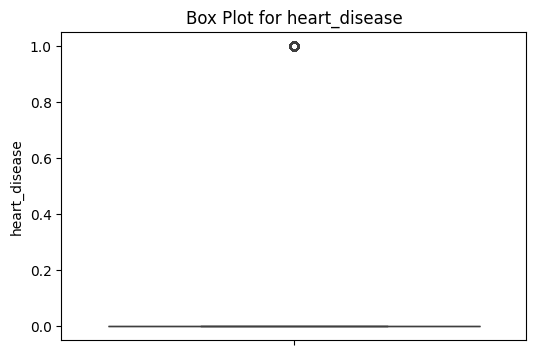

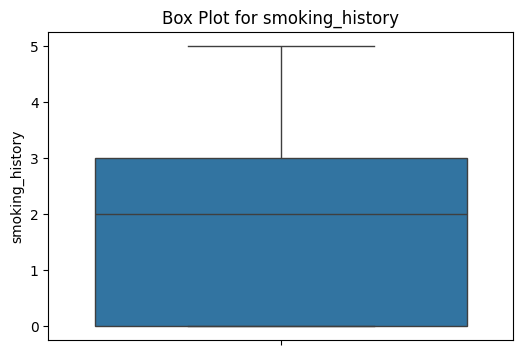

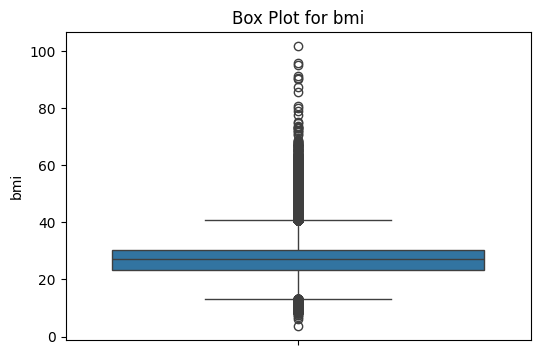

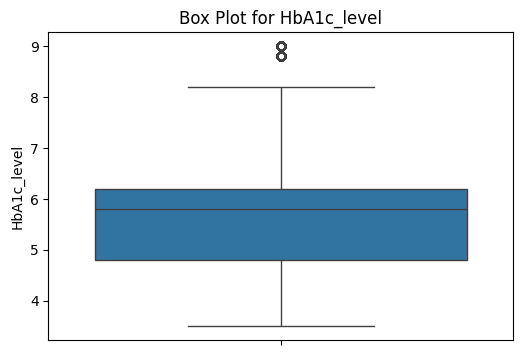

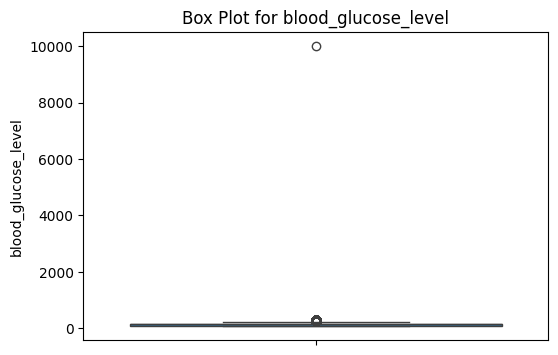

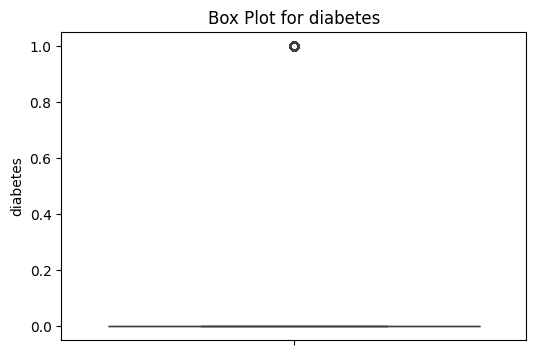

In [88]:
for att in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=dataset[att])
    plt.title(f"Box Plot for {att}")
    plt.show()

In [89]:
dt = dataset.copy()
num=dt.select_dtypes(include=['number']).columns
num = num.drop({'diabetes','hypertension', 'heart_disease','smoking_history'})
mask = pd.Series(True, index=dt.index)
for i in num:
    max_limit = dt[i].mean() + 3*dt[i].std()
    min_limit = dt[i].mean() - 3*dt[i].std()
    print("max limit of ",i," is ",max_limit, " & min limit of ",i," is ",min_limit)
    mask &= (dt[i] < max_limit) & (dt[i] > min_limit)
new_dataset = dt[mask]

max limit of  gender  is  2.0635116533771707  & min limit of  gender  is  -0.8921033674600297
max limit of  age  is  107.78057900036285  & min limit of  age  is  -23.29422077356623
max limit of  bmi  is  48.12595468236361  & min limit of  bmi  is  6.510898112203527
max limit of  HbA1c_level  is  8.739535431519997  & min limit of  HbA1c_level  is  2.315510568480003
max limit of  blood_glucose_level  is  291.99294248518595  & min limit of  blood_glucose_level  is  -15.681165602954792


In [90]:
# delete illogical val
index_to_drop = new_dataset[((new_dataset['smoking_history'] > 5) | (new_dataset['hypertension'] > 1) | (new_dataset['heart_disease'] > 1) | (new_dataset['diabetes'] > 1))].index

new_dataset = new_dataset.drop(index_to_drop)

In [91]:
new_dataset.shape

(97011, 9)

In [92]:
new_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,1,41.39193,0,0,3.0,28.034572,6.600000,80,0
3,1,37.00000,0,0,4.0,25.262602,5.527523,155,0
4,0,75.00000,1,1,4.0,23.212811,4.800000,155,0
5,1,16.00000,0,0,0.0,28.156373,6.600000,85,0
6,1,46.00000,0,0,0.0,16.546449,6.500000,200,1


In [93]:
x=np.array(new_dataset.drop('diabetes',axis=1))
y=np.array(new_dataset['diabetes'])

In [94]:
x.shape

(97011, 8)

In [95]:
y.shape

(97011,)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state=2)

In [97]:
model_logistic = LogisticRegression()

# آموزش مدل
model_logistic.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
model_logistic.score(X_test,Y_test)

0.9353009895547004

In [99]:
y_logistic_predict=model_logistic.predict(X_test)

In [100]:
cm = confusion_matrix(Y_test, y_logistic_predict)

# نمایش ماتریس سردرگمی
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[26582   579]
 [ 1304   639]]


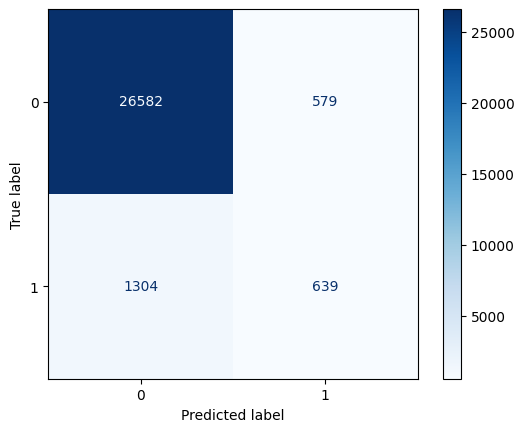

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

In [102]:
accuracy = accuracy_score(Y_test, y_logistic_predict)
precision = precision_score(Y_test, y_logistic_predict, average='binary')  # برای دسته‌بندی دودویی
recall = recall_score(Y_test, y_logistic_predict, average='binary')
f1 = f1_score(Y_test, y_logistic_predict, average='binary')

# نمایش نتایج
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.52
Recall: 0.33
F1-Score: 0.40


In [103]:
print("\nClassification Report:")
print(classification_report(Y_test, y_logistic_predict, target_names=["Class 0", "Class 1"]))


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.98      0.97     27161
     Class 1       0.52      0.33      0.40      1943

    accuracy                           0.94     29104
   macro avg       0.74      0.65      0.69     29104
weighted avg       0.92      0.94      0.93     29104



In [104]:
model_DecisionTree = DecisionTreeClassifier(random_state=42)

# آموزش مدل
model_DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
model_DecisionTree.score(X_test,Y_test)

0.9512094557449148

In [106]:
y_DecisionTree_predict=model_DecisionTree.predict(X_test)

In [107]:
con = confusion_matrix(Y_test, y_DecisionTree_predict)

# نمایش ماتریس سردرگمی
print("Confusion Matrix:")
print(con)

Confusion Matrix:
[[26402   759]
 [  661  1282]]


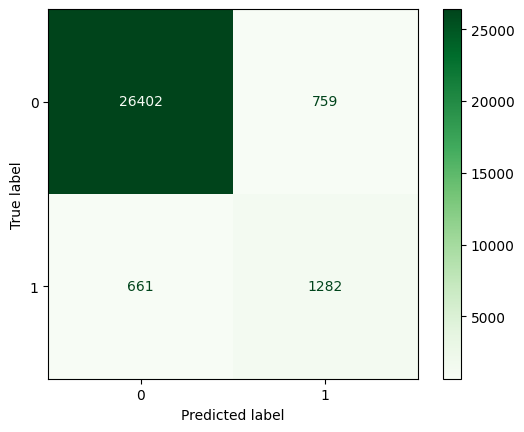

In [108]:
showD = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=[0, 1])
showD.plot(cmap="Greens")

In [109]:
accuracy = accuracy_score(Y_test, y_DecisionTree_predict)
precision = precision_score(Y_test, y_DecisionTree_predict, average='binary')  # برای دسته‌بندی دودویی
recall = recall_score(Y_test, y_DecisionTree_predict, average='binary')
f1 = f1_score(Y_test, y_DecisionTree_predict, average='binary')

# نمایش نتایج
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.63
Recall: 0.66
F1-Score: 0.64


In [110]:
print("\nClassification Report:")
print(classification_report(Y_test, y_DecisionTree_predict, target_names=["not diabets", "diabets"]))


Classification Report:
              precision    recall  f1-score   support

 not diabets       0.98      0.97      0.97     27161
     diabets       0.63      0.66      0.64      1943

    accuracy                           0.95     29104
   macro avg       0.80      0.82      0.81     29104
weighted avg       0.95      0.95      0.95     29104



In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# k range
k_values = range(2,7)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"silhouette_score for k={k} : {silhouette_avg:.3f}")


silhouette_score for k=2 : 0.398
silhouette_score for k=3 : 0.468
silhouette_score for k=4 : 0.432
silhouette_score for k=5 : 0.410
silhouette_score for k=6 : 0.379


In [119]:
# find optimal_k
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"best k: {optimal_k}")

best k: 3


In [120]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)

In [121]:
# kMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
new_dataset['KMeans_Cluster'] = kmeans.fit_predict(X_normalized)

In [122]:
# hierarchy
np.random.seed(42)
sample_indices = np.random.choice(len(X_normalized), size=2000, replace=False)
X_sample = X_normalized[sample_indices]


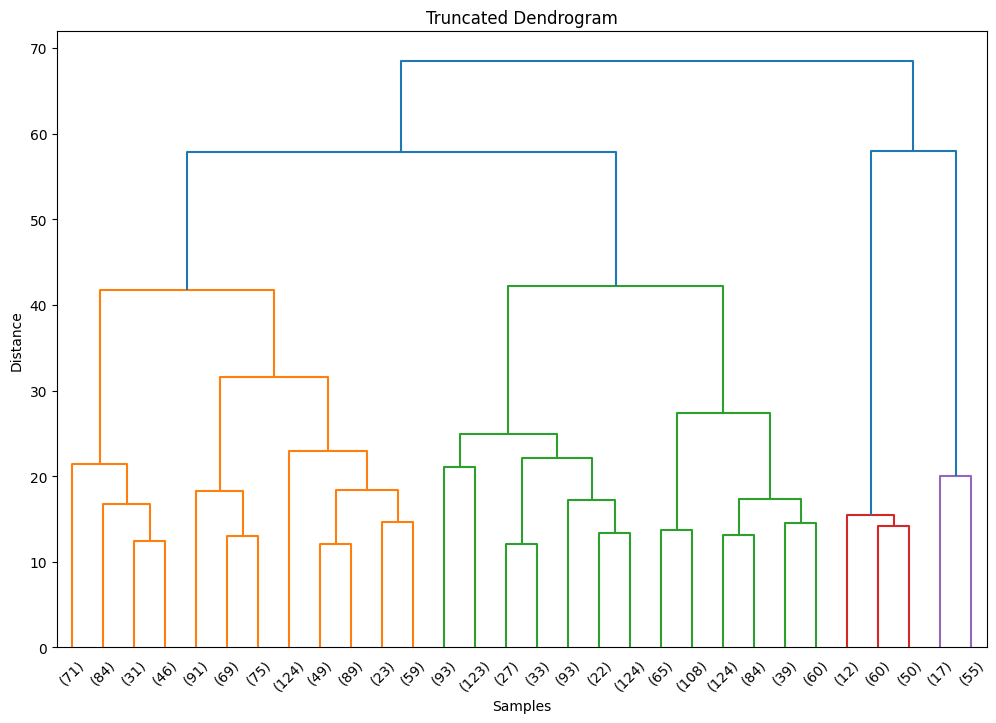

In [123]:
# plot dendrogram
linked = linkage(X_sample, method='ward', metric='euclidean')
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=30, distance_sort='ascending', show_leaf_counts=True)
plt.title('Truncated Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [124]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

In [125]:
clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = clustering.fit_predict(X_reduced)


In [126]:
# add cluster to dataset
new_dataset['hierarchical_Cluster'] = clusters

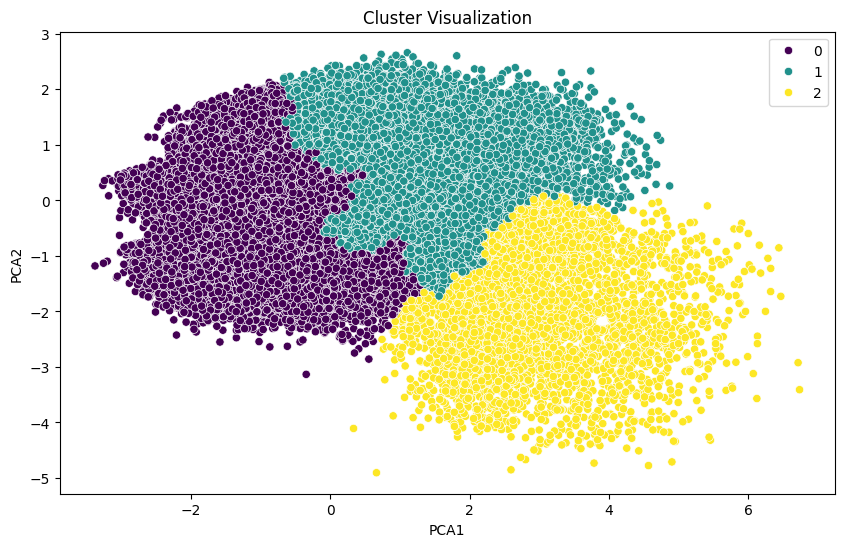

In [127]:
# show clustering
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_reduced)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=clusters, palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [128]:
# kmeans clusters mean
kmeans_clusters_mean = new_dataset.groupby('KMeans_Cluster').mean()
print("KMeans mean of clusters:\n", kmeans_clusters_mean)

KMeans mean of clusters:
                   gender        age  hypertension  heart_disease  \
KMeans_Cluster                                                     
0               0.644149  44.562660       0.00000       0.000000   
1               0.551322  35.291383       0.00000       0.000000   
2               0.508887  63.015304       0.70949       0.376364   

                smoking_history        bmi  HbA1c_level  blood_glucose_level  \
KMeans_Cluster                                                                 
0                      0.320863  27.933178     5.483964           136.790120   
1                      3.238363  25.533077     5.426388           134.055863   
2                      1.647230  29.656175     5.668465           145.203617   

                diabetes  hierarchical_Cluster  
KMeans_Cluster                                  
0               0.067679              0.682783  
1               0.029970              0.138485  
2               0.232096            

In [129]:
# hierarchical clusters mean
hierarchical_clusters_mean = new_dataset.groupby('hierarchical_Cluster').mean()
print("hierarchical clusters mean :\n", hierarchical_clusters_mean)

hierarchical clusters mean :
                         gender        age  hypertension  heart_disease  \
hierarchical_Cluster                                                     
0                     0.507608  30.608449      0.001839       0.000297   
1                     0.734906  54.501773      0.119261       0.003905   
2                     0.283924  66.521537      0.432949       0.687624   

                      smoking_history        bmi  HbA1c_level  \
hierarchical_Cluster                                            
0                            2.514036  24.374410     5.367047   
1                            0.955922  30.168867     5.560854   
2                            2.035416  29.758445     5.963052   

                      blood_glucose_level  diabetes  KMeans_Cluster  
hierarchical_Cluster                                                 
0                              131.313052  0.016944        0.764700  
1                              140.190776  0.095414        0.41

In [134]:
kmeans_labels = {
    0: 'not diabets',
    2: 'diabets',
    1: 'maybe diabets'
}
new_dataset['KMeans_Label'] = new_dataset['KMeans_Cluster'].map(kmeans_labels)

In [131]:
hierarchica_labels = {
    1: 'maybe diabets',
    0: 'not diabets',
    2: 'diabets'
}
new_dataset['hierarchical_Label'] = new_dataset['hierarchical_Cluster'].map(kmeans_labels)

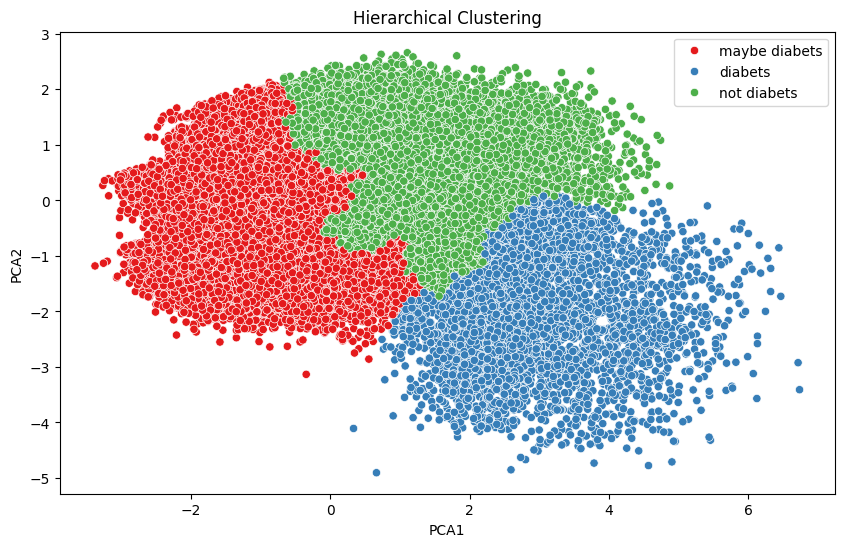

In [135]:
# show hierarchical_Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=new_dataset['hierarchical_Label'], palette='Set1')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

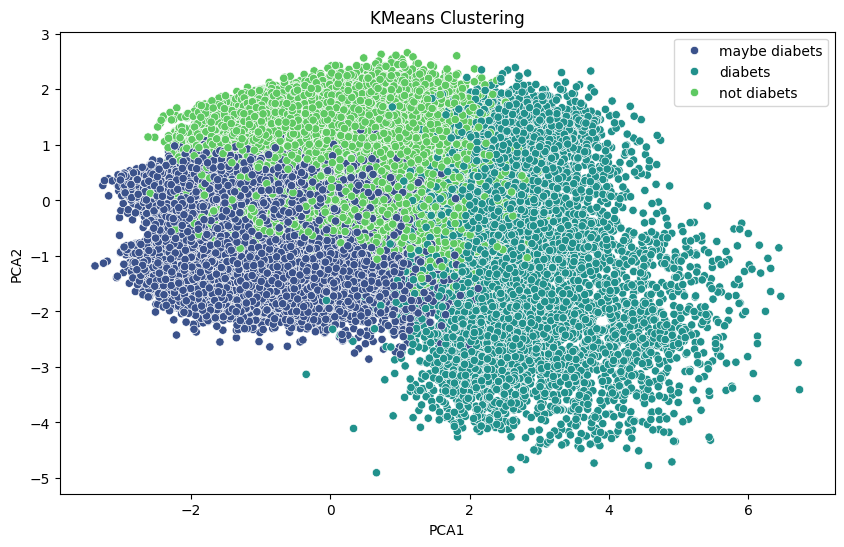

In [136]:
# show KMeans Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=new_dataset['KMeans_Label'], palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()